# Random Variables and Random Number Generation

There are many methods to generate random numbers from a range of probability distributions and many methods to visualise these probability density functions. In this experiment we investigate two ways to visualise probability density functions (PDFs) - the kernel density method and the histogram method. We saw how these compared for the normal and uniform PDFs. We also looked at the inbuilt methods in python for generating these PDFs and checked that these inbuilt functions obeyed multinomial theory, as well as observing what happened as the number of samples $N$ increased.

Next, we looked at functions of random variables to create new random variables with more complicated PDFs. We also saw how the Jacobian method could be used to find the theoretical probability density function of the new random variable created using the function of another random variable. The samples were overlaid with the theoretical PDF from the Jacobian method to verify the results.

We also investigated the inverse CDF method as a method to generate samples from a more complicated PDF; in this experiment we focused on the exponential distribution. On top of that, the Monte Carlo estimator was investigated as a method to approximate the true mean and variance of a probability distribution using samples.

Lastly, we looked at simulations from non-standard densities. This was achieved through mixing normal distributions with a random variance that was sampled first from an exponential distribution and then from a Gamma distribution. The shapes of these were compared to each other and then to a normal distribution, and the probability distributions were theorised and then compared to the non-standard density samples.


In [2]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
from scipy.stats import uniform

First we need a function to implement the kernel density estimate with the equation:
$$ \pi_{KS}(x) = \frac{1}{N} \sum_{i=0}^{N} \frac{1}{\sigma} \mathcal{K}(\frac{x - x^{(i)}}{\sigma}) $$

We will use a Guassian kernel:
$$ \mathcal{K}(x) = \mathcal{N}(x| 0, 1) $$

This will give us a method to estimate a probability density function (PDF) given samples drawn from that PDF.

In [3]:
def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data""" 
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf 
            u = (x - mu) / abs(sigma)
            y =(1/(np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value 
        return np.array(pdf)
    return ksd

Next, we will compare using this kernel density estimate function with plotting the histogram of the data samples directly. We will also see how the number of samples effects the spread of the samples and the convergence the the underlying pdf. Using the weak law of large numbers $(\lim_{n \rightarrow \infty} P(|Y_n - Y| < \epsilon ) = 1)$ we can see that the empirical average will converge to the mathematical expectewd value as the number of samples grows. We can get the expected value for the number of samples in each bin for the unifrom distribution using multinomial distribution theory. This tells us that the mean value follows:
$$ \mu = N P_j $$
where $N$ is the number of samples and $p_j$ is the probability that a sample is within bin $j$. For the uniform distribution $P_j = \frac{1}{b} $ where $b$ is the number of bins and thus:
$$ \mu =  \frac{N}{b} $$
We also know that the variance is:
$$\sigma^2 = N P_j (1-P_j) = \frac{N}{b} (1-\frac{1}{b}) $$
Using this we can plot the histogram for the uniform distribution with the expected value overlayed and +/- 1,2 and 3 standard deviations. This will allow us to see what happens when the number of samples increases.

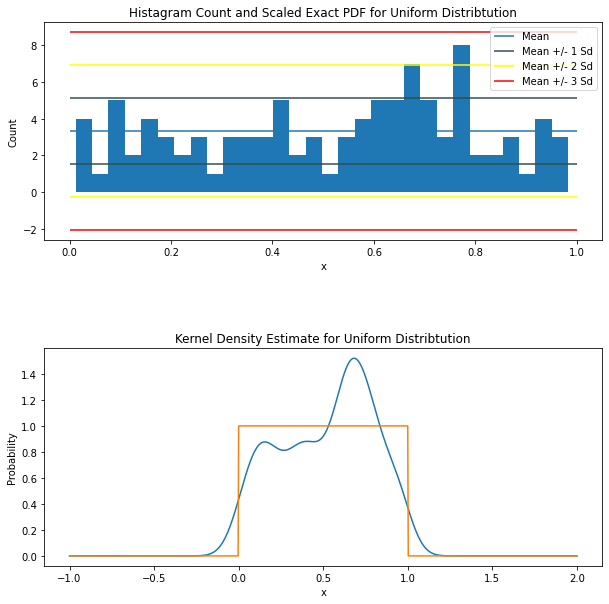

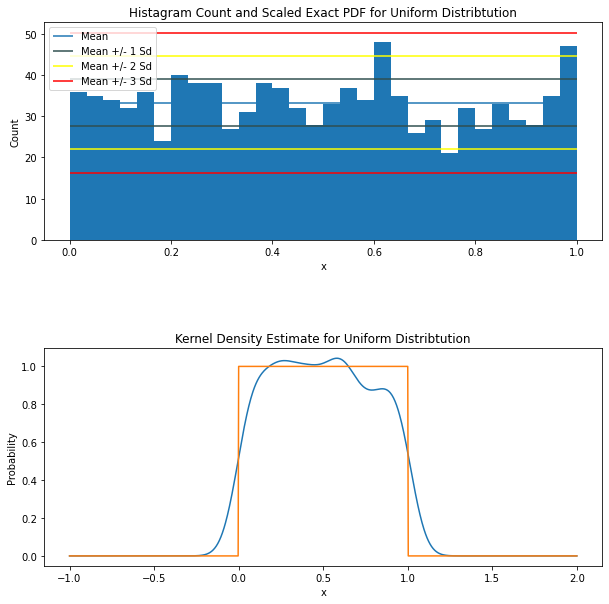

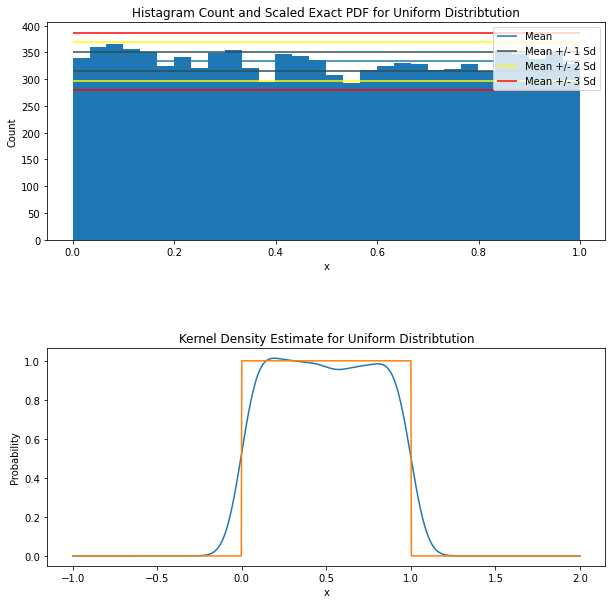

In [4]:
N=1000
bins=30
# Plot uniform distribution 

def plot_uniform(N, bins):

    mean_n = N/bins
    sd_n = ((N/bins) * (1-(1/bins))) ** (1/2)
    fig2, ax2 = plt.subplots(2, figsize=(10,10)) 
    x = np.random.rand(N)
    ax2[0].hlines(mean_n, 0, 1, label='Mean') 
    ax2[0].hlines(mean_n + sd_n, 0, 1, colors='darkslategray', label='Mean +/- 1 Sd') 
    ax2[0].hlines(mean_n - sd_n, 0, 1, colors='darkslategray') 
    ax2[0].hlines(mean_n + sd_n*2, 0, 1, colors='yellow', label='Mean +/- 2 Sd') 
    ax2[0].hlines(mean_n - sd_n*2, 0, 1, colors='yellow') 
    ax2[0].hlines(mean_n + sd_n*3, 0, 1, colors='red', label='Mean +/- 3 Sd') 
    ax2[0].hlines(mean_n - sd_n*3, 0, 1, colors='red')
    ax2[0].hist(x, bins=bins)
    ax2[0].legend()


    ks_density = ksdensity(x, width=0.08) 
    x_values = np.linspace(-1., 2., 1000) 
    p_u = uniform.pdf(x_values) 
    #ax2[0].plot(x_values, p_u * mean_n)
    ax2[1].plot(x_values, ks_density(x_values))
    ax2[1].plot(x_values, p_u)

    plt.subplots_adjust(hspace=0.5)
    ax2[0].title.set_text('Histagram Count and Scaled Exact PDF for Uniform Distribtution')
    ax2[0].set_xlabel('x')
    ax2[0].set_ylabel('Count')
    ax2[1].title.set_text('Kernel Density Estimate for Uniform Distribtution')
    ax2[1].set_xlabel('x')
    ax2[1].set_ylabel('Probability')

    plt.show()

N = [100, 1000, 10000]

for n in N:
    plot_uniform(n, bins)

As we can see, the number of samples in eaech bin of histogram converges to the theoretical mean stays within the theoretical +/- 3 standard deviations as expected. The kernel density estimate does not seem so good for the uniform likely due to the discontinuity in the gradient which does not pose well for smoothing using a Guassian kernel. let's do the same for the Normal distribution, finding $P_j$ in the mulinominal theoretical mean and standard deviation formulas using scipy.stats.norm.cdf.

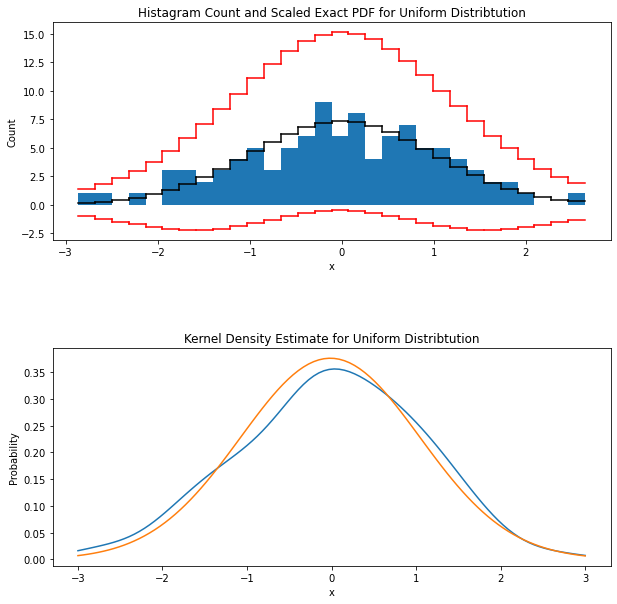

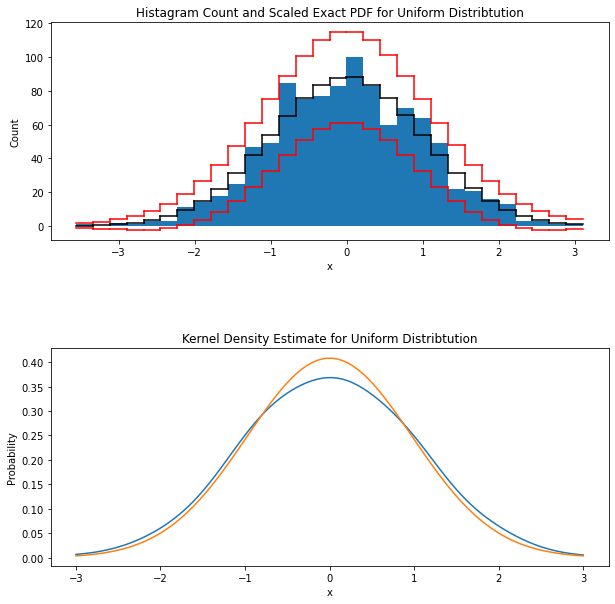

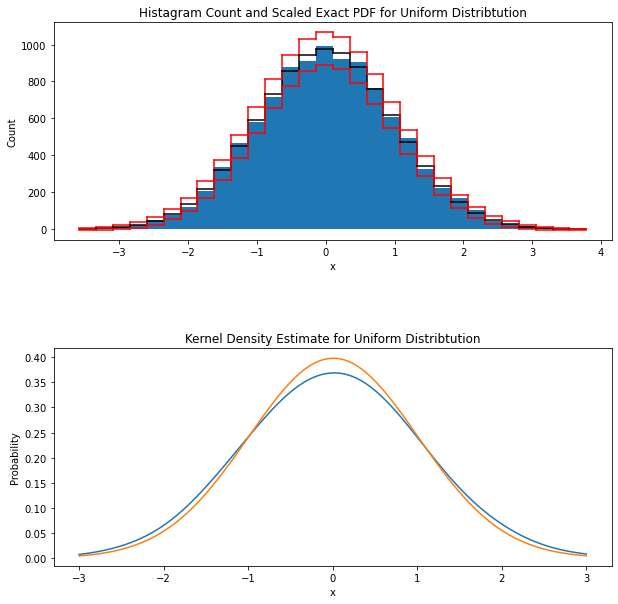

In [5]:

bins=30

def plot_normal(N, bins):

    fig, ax = plt.subplots(2, figsize=(10,10))
    x = np.random.randn(N)
    mu, std = norm.fit(x)
    n, edges, patches =  ax[0].hist(x, bins=bins) # number of bins

    ks_density = ksdensity(x, width=0.4)
    # np.linspace(start, stop, number of steps) 
    x_values = np.linspace(-3, 3, 100) 
    p = norm.pdf(x_values, mu, std)
    #ax[0].plot(x_values, p * 2400)
    ax[1].plot(x_values, ks_density(x_values))
    ax[1].plot(x_values, p)

    p_j_list = [scipy.stats.norm.cdf(edges[i]) - scipy.stats.norm.cdf(edges[i-1]) for i in range(1, len(edges))]

    mean = [N * i for i in p_j_list]
    sd = [ (N * i * (1-i))**(1/2) for i in p_j_list]

    for i in range(len(edges)):
        if i == 0:
            pass
        elif i >= len(edges) -1:
            mu = mean[i-1]
            y1 = mu - 3*sd[i-1]
            y2 = mu + 3*sd[i-1]
            ax[0].plot([edges[i], edges[i-1]], [mu, mu], color="black")
            ax[0].plot([edges[i], edges[i-1]], [y1, y1], color="red")
            ax[0].plot([edges[i], edges[i-1]], [y2, y2], color="red")
        else:
            mu_next = mean[i]
            mu = mean[i-1]
            y1 = mu - 3*sd[i-1]
            y1_next = mu_next - 3*sd[i]
            y2 = mu + 3*sd[i-1]
            y2_next = mu_next + 3*sd[i]
            ax[0].plot([edges[i], edges[i-1]], [mu, mu], color="black")
            ax[0].plot([edges[i], edges[i]], [mu, mu_next], color="black")
            ax[0].plot([edges[i], edges[i-1]], [y1, y1], color="red")
            ax[0].plot([edges[i], edges[i-1]], [y2, y2], color="red")
            ax[0].plot([edges[i], edges[i]], [y1, y1_next], color="red")
            ax[0].plot([edges[i], edges[i]], [y2, y2_next], color="red")

    plt.subplots_adjust(hspace=0.5)
    ax[0].title.set_text('Histagram Count and Scaled Exact PDF for Uniform Distribtution')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('Count')
    ax[1].title.set_text('Kernel Density Estimate for Uniform Distribtution')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('Probability')

    plt.show()


for n in N:
    plot_normal(n, bins)

We can see a similar pattern as the number of samples increases for the histogram and the kernel density estimate also does a lot better at fitting the theoretical pdf due to the smooth and continuous nature of the pdf. The kernel density estimate also has the benfit that it already integrates to 1 and thus is an allowed pdf function. Both methods of visualising the functions improves as the number of samples increases, as expected. Now lets look at using the Jacobian formula for finding the pdf of functions of random variables.

## Functions of Random Variables

The Jacobian function gives us the output density $p(y)$ from $p(y)$ given that $y = f(x)$ and $f()$ is a one-to-one, invertible, differentiable function and takes the form:
$$p(y) = \sum_{k=1}^{K} \frac{p(x)}{|dy/dx|} |_{x=x_k(y)} $$

Let's compare the theoretical pdf from the Jacobian formula to a histogram of the tranformed samples evalueated from $y^{(i)} = f(x^{(i)})$.

Let's first look at $p(x) = \mathcal{N}(x|0,1)$ and $f(x) = x^2$, using the Jacobian formula we can find:
$$p(y) = \frac{p(x=\sqrt{y})}{|2\sqrt{y}|} + \frac{p(x=-\sqrt{y})}{|2\sqrt{y}|} = \frac{\exp(-\frac{1}{2}y)}{|\sqrt{y}|\sqrt{2 \pi}}$$

/var/folders/hx/l5vvl9xj1lgg6tky6fl7m7sr0000gn/T/ipykernel_18057/3058295710.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/(2*np.pi)**1/2) * np.exp((-0.5)*y) / np.abs(2* (y**1/2))


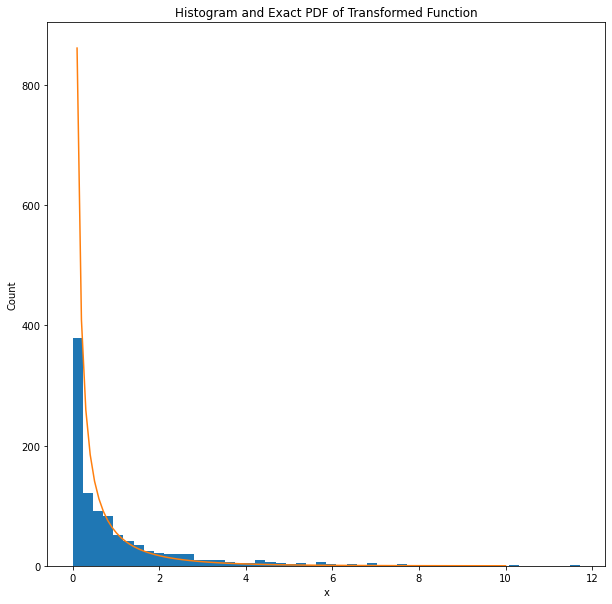

In [6]:
fig, ax = plt.subplots(1, figsize=(10,10))
x3 = np.random.randn(1000)
y3 = [x**2 for x in x3]

ax.hist(y3, bins=50)

y = np.linspace(0, 10, 100)
def p_y2(y):
    return (1/(2*np.pi)**1/2) * np.exp((-0.5)*y) / np.abs(2* (y**1/2))

p_y_list2 = [p_y2(i) *1150 for i in y]
ax.plot(y, p_y_list2)

ax.title.set_text('Histogram and Exact PDF of Transformed Function')
ax.set_xlabel('x')
ax.set_ylabel('Count')
plt.show()

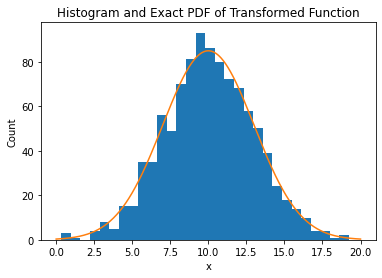

/var/folders/hx/l5vvl9xj1lgg6tky6fl7m7sr0000gn/T/ipykernel_18057/2724001641.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/(2*np.pi)**1/2) * np.exp((-0.5)*y) / np.abs(2* (y**1/2))


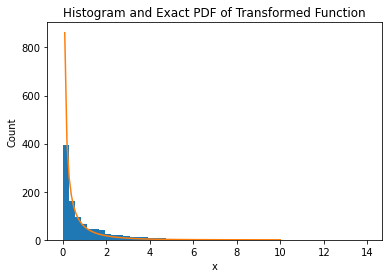

In [8]:
a=3
b=10


fig, ax = plt.subplots(1)
x2 = np.random.randn(1000)
y2 = [x*a + b for x in x2]
ax.hist(y2, bins=30)

y = np.linspace(0, 20, 1000)
def p_y(y, a=a, b=b):
    return (1/(2*np.pi)**1/2) * np.exp((-0.5)*(((y-b)/a)**2)) / np.abs(a)
p_y_list = [p_y(i) * 3200 for i in y]


ax.title.set_text('Histogram and Exact PDF of Transformed Function')
ax.set_xlabel('x')
ax.set_ylabel('Count')
ax.plot(y, p_y_list)
plt.show()


fig, ax = plt.subplots(1)
x3 = np.random.randn(1000)
y3 = [x**2 for x in x3]

ax.hist(y3, bins=50)

y = np.linspace(0, 10, 100)
def p_y2(y):
    return (1/(2*np.pi)**1/2) * np.exp((-0.5)*y) / np.abs(2* (y**1/2))

p_y_list2 = [p_y2(i) *1150 for i in y]
ax.plot(y, p_y_list2)

ax.title.set_text('Histogram and Exact PDF of Transformed Function')
ax.set_xlabel('x')
ax.set_ylabel('Count')
plt.show()

Now let's do the same for modelling a carrier signal and a clipped carrier signal, of the form $p(x) = \mathcal{U}(x|0, 2\pi)$, $f(x) = \sin(x)$ and $f(x) = \min(\sin(x), 0.7)$. 

For the first case the Jacobian formula predicts:
$$ p(y) = \frac{p(x=\sin^{-1}(y))}{|\sqrt{1 - y^2}|} + \frac{p(x=\pi-\sin^{-1}(y))}{|\sqrt{1 - y^2}|}\ $$
By taking  $p(x) = \mathcal{U} (x|0, 2 \pi) $, we get 

$$ p(y) = \frac{1}{\pi |\sqrt{1 - y^2}|}$$ 
for $-1 < y < 1$. 
This formula can be verified by looking at the below plots where histogram data from the distribution is compared to the proposed formula above using the Jacobian method.

For the second case:
$$ p(y) =  \sum_{k=1}^3 \frac{p(x)}{|dy/dx|}|_{x=f_k^{-1}(y)} = \frac{2p(x=\sin^{-1}(y))}{|\sqrt{1 - y^2}|} + a \delta (y-0.7) =  \frac{1}{\pi |\sqrt{1 - y^2}|} + a \delta (y-0.7) $$

for $ -1 < y \leq 0.7 $. Where $a$ is a constant that can be found by setting the integral of the expression to 1, 
$$ a = \frac{(\pi - \sin^{-1}(0.7)) - \sin^{-1}(0.7)}{2\pi} = 0.253$$
giving $ p(y) = \frac{1}{\pi |\sqrt{1 - y^2}|} + 0.253 \delta (y-0.7)$. This can again be verified by comparing the proposed formula with the histogram of samples from the distribution and as can be seen from the histogram data and the plot of the p(y) formula in the below plots, the probability distribution function is a truncated version of the formula for $y=f(x)= \sin (x)$, with the area of the truncated part of the graph being concentrated on the delta function in the $y = f(x) = \min (\sin(x), 0.7)$ PDF graph.


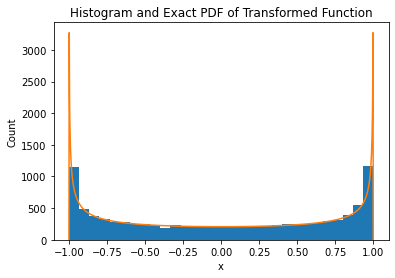

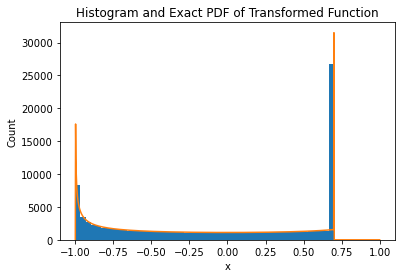

In [7]:
fig, ax = plt.subplots(1)
x2 = np.random.uniform(low=0.0, high = 2* np.pi, size=(10000,))
y2 = [np.sin(x) for x in x2]
ax.hist(y2, bins=30)

y = np.linspace(-1, 1, 1000)
def p_y(y):
    if y <= -1 or y>= 1:
        return 0
    else:
        return (1/(2*np.pi) ) / np.abs(np.sqrt(1 - y**2))

p_y_list = [p_y(i) * 1300 for i in y]


ax.title.set_text('Histogram and Exact PDF of Transformed Function')
ax.set_xlabel('x')
ax.set_ylabel('Count')
ax.plot(y, p_y_list)
plt.show()

fig, ax = plt.subplots(1)
x2 = np.random.uniform(low=0.0, high = 2* np.pi, size=(100000,))

def f(x):
    if np.sin(x) > 0.7:
        return 0.7
    else:
        return np.sin(x)  


def p_y2(y):
    if y>-1 and y<0.699:
        return (1/(2*np.pi) ) / np.abs(np.sqrt(1 - y**2))
    elif y >= 0.699 and y <= 0.7:
        return 4.5
    else:
        return 0

p_y_list2 = [p_y2(i) *7000 for i in y]

y2 = [f(x) for x in x2]
ax.hist(y2, bins=50)

ax.plot(y, p_y_list2)

ax.title.set_text('Histogram and Exact PDF of Transformed Function')
ax.set_xlabel('x')
ax.set_ylabel('Count')
plt.show()

## Inverse CDF Method

The inverse CDF method is a widely used method for generation random variates from a specified probability density function. We find the CDF and inverse CDF of the exponential distribution as an illustrative example. 
Using the exponential function with mean 1, we have the PDF, $p(y) = e^{-y}, y\leq0$. This can be used to get the CDF as 

$$ F(y)=\int_0^y e^{-y}\, \mathrm{d}y = -e^{-y} |_0^y = 1-e^{-y} $$

This can then be used to find the inverse of the CDF as $ F^{-1}(y) = - \ln{|1-y|}$.

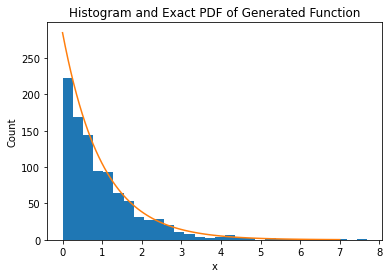

In [15]:
fig, ax = plt.subplots(1)
y_pt3 = np.random.rand(1000)
def F(y):
    return - np.log(np.abs(1-y))
F_list = [F(i) for i in y_pt3]

ax.hist(F_list, bins=30)

x_pt3 = np.linspace(0, 7, 100)
p_y_pt3 = [np.exp(-i) *285  for i in x_pt3]
ax.plot(x_pt3, p_y_pt3)
ax.title.set_text('Histogram and Exact PDF of Generated Function')
ax.set_xlabel('x')
ax.set_ylabel('Count')
plt.show()

## Monte Carlo Method


The monte Carlo method can be used to estimate the mean and variance from the generated random samples, the monte carlo mean $ \hat{\mu}$, which is an estimate of the true mean, $\mu$,  can be found using the formula:
$$ \hat{\mu} =  \frac{1}{N} \sum_{i=1}^N y^{(i)} $$
and the variance can be estimated using Monte Carlo by using:
$$ \hat{ \sigma}^2 = \frac{1}{N} \sum_{i=1}^N (y^{(i)})^2 - (\hat{\mu})^2 $$
By implementing these equations in Python we could compare the Monte Carlo method with the theoretical mean and variance for the exponential distribution ($p(y) = e^{-y}$). The python implementation is shown in the appendix and the theoretical mean and variance is found as  $\mu = 1.0$ and $\sigma^2 = 1.0$. The monte carlo mean for a sample size of $N=1000$ was found as $\mu = 0.9774$ giving a percentage difference as $2.25\%$, and the variance was found as $0.9641$ giving a percentage difference of $3.59\%$. This shows the Monte Carlo estimator gives values close to the theoretical values.

It can be shown that the Monte Carlo mean estimate is unbiased by taking the expectation of the mean estimate and observing that the expectation is equal to the true mean of the distribution. This can be seen bellow:

$$ \mathbb{E} \{ \hat{\mu} \} = \mathbb{E} \{ \frac{1}{N} \sum_{i=1}^N y^{(i)} \} = \frac{1}{N} \sum_{i=1}^N \mathbb{E} \{y^{(i)} \} = \frac{1}{N} \sum_{i=1}^N \mu = \frac{N}{N} \mu = \mu $$
This was corroborated by finding the mean of 10,000 samples of Monte Carlo mean and this was found to be 1.0008, giving a percentage difference of $0.08\%$. The variance of the Monte Carlo Mean estimator can be shown to be $\sigma^2/N$ as below:
$$Var(\hat{\mu}) = \mathbb{E} \{ (\hat{\mu} - \mathbb{E} \{ \hat{\mu} \})^2\} = \mathbb{E} \{ \hat{\mu}^2 \} - \mathbb{E} \{ \hat{\mu} \}^2 = \mathbb{E} \{ (\frac{1}{N} \sum_{i=1}^N y^{(i)})^2 \} - \mu^2 =  \frac{1}{N^2} (\sum_{i=1}^N\sum_{j=1}^N \mathbb{E} \{y^{(i)}y^{(j)}\}) - \mu^2 $$

$$ =  \frac{1}{N^2}(N^2 \mu^2 +N\sigma^2) - \mu^2 = \frac{\sigma^2}{N} $$
Note that $\mathbb{E} \{y^{(i)}y^{(j)}\} = \mu^2 + \sigma^2$ if $ i = j$ and $\mathbb{E} \{y^{(i)}y^{(j)}\} = \mu^2$ if $ i \neq j$.
This shows that theoretically the variance of the Monte Carlo mean decreases with $1/N$ and thus converges to the true mean as $N$ increases. This can be shown experimentally by looking at the mean squared error of many Monte Carlo mean estimates with varying N used. This can be seen in the figures below, as you can see from this graph, the mean squared error seems to decrease with a 1/N envelope, as can be seen from the yellow envelope line, and thus the mean squared error converges to zero as N increases.




Monte Carlo Mean: 1.0054766666342805
Percentage difference with theoretical mean: 0.547666663428048%

Monte carlo Variance: 1.0176677842086144
Percentage difference with theoretical variance: 1.7667784208614368%


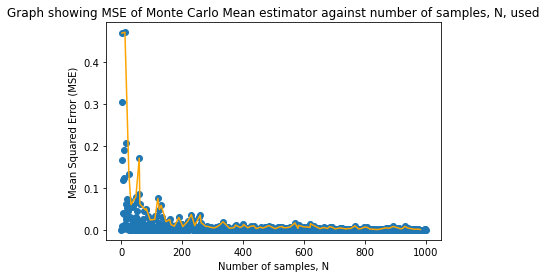

1.0001695289807113


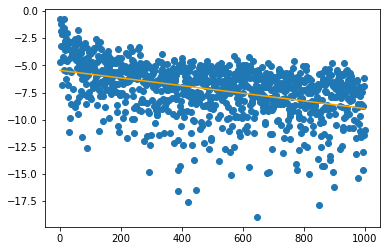

 
-0.003514 x - 5.454


In [24]:

def MC_mean(F):
    mu_hat = 0
    for i in range(len(F)):
        mu_hat += F[i]
    
    return mu_hat/len(F)

def MC_var(F):
    E_squared = 0
    for i in range(len(F)):
        E_squared += (F[i]) ** 2
    E_squared /= len(F)

    return E_squared - (MC_mean(F)) ** 2



mc_mean = MC_mean(F_list)
mc_var = MC_var(F_list)
mean_perc_diff = np.abs(mc_mean - 1) * 100
var_perc_diff = np.abs(mc_var - 1) * 100
print("Monte Carlo Mean: {}".format(mc_mean))
print("Percentage difference with theoretical mean: {}%".format(mean_perc_diff)) 
print()
print("Monte carlo Variance: {}".format(mc_var))
print("Percentage difference with theoretical variance: {}%".format(var_perc_diff))     

plt.show()

def monte_plotter(N):
    MSE = []
    MSE_max=[]
    N_list=[]
    N_list_max=[]
    count = 0
    for i in range(N):
        if i == 0:
            pass
        else:
            count+=1
            y = np.random.rand(i)
            F_list = [F(i) for i in y]
            mc_mean = MC_mean(F_list)
            mse = (mc_mean - 1) ** 2
            MSE.append(mse)
            N_list.append(i)
            if count==10:
                MSE_m = max(MSE[-10:])
                MSE_max.append(MSE_m)
                N_list_max.append(N_list[MSE.index(MSE_m)])
                count=0

    MSE.insert(0, 0)
    N_list.insert(0,0)
    N_list2, logMSE = zip(*((x, np.log(y)) for x, y in zip(N_list_max, MSE_max) if y != 0.0))
    exp_model = np.poly1d(np.polyfit(N_list2, logMSE, 1))
    exp_list = [np.exp(exp_model(i)) for i in N_list2]
    plt.title("Graph showing MSE of Monte Carlo Mean estimator against number of samples, N, used")
    plt.xlabel("Number of samples, N")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.scatter(range(N), MSE)
    plt.plot(N_list_max, MSE_max, color="orange")
    #plt.plot(N_list2, exp_list)
    plt.show()

    return N_list, MSE

def monte_plotter2(N):
    MSE = []
    N_list = []
    y = np.random.rand(N)
    F_list = [F(i) for i in y]
    for x in range(N):
        if x == 0:
            pass
        else:
            N_list.append(x)
            MSE_i = MC_mean(F_list[:x])
            MSE.append(MSE_i)
    plt.title("Graph showing MSE of Monte Carlo Mean estimator against number of samples, N, used")
    plt.xlabel("Number of samples, N")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.plot(N_list, MSE)
    plt.show()

def monte_mean(N):
    means = []
    for i in range(N):
        y = np.random.rand(1000)
        F_list = [F(i) for i in y]
        MC = MC_mean(F_list)
        means.append(MC)

    return MC_mean(means)

N_list,MSE = monte_plotter(1000)

print(monte_mean(1000))


N_list2, logMSE = zip(*((x, np.log(y)) for x, y in zip(N_list, MSE) if y != 0.0))
exp_model = np.poly1d(np.polyfit(N_list2, logMSE, 1))
plt.scatter(N_list2, logMSE)
plt.plot(N_list2, exp_model(N_list2), color="orange")
plt.show()
print(exp_model)

## Simulation from Non-Standard Densities


Next, we investigated the tail behaviour of the Gamma mixing distribution, that is when $|x|$ became large. The formula of the tails was known to follow $p(x) \varpropto |x|^{-\beta}$, thus a graph of the natural log of the kernel density estimate divided by the natural log of $|x|$  ($\frac{\ln(p(x))}{\ln(|x|)} \varpropto -\beta$) could be plotted as seen in the figures below. The constant value as $|x|$ gets large can be plotted against different values of $\theta$, this can be seen in the figures below. By looking at the graph the relationship between $\beta$ and $\theta$ can be deduced. As can be seen from the figures below, the relationship seems to be linear and by fitting a linear model to the data (orange line), we found the relationship to be $- (1.018 \theta + 2.027)$, giving $\beta = (1.018 \theta + 2.027)$.  

To verify our results for the resulting distribution and our guess for the tail behaviour of the $p(x)$ formula, we can find the probability density function of $p(x)$ using the marginalisation integral. First we must find the probability density function of $U=1/V$ using the Jacobian method. We found that $f^{-1}(u) = 1/u$ and the first derivative as $|\frac{du}{dv}| = |-1/v^2| = |-u^2| = u^2$. Subbing this into the Jacobian formula we obtain:
$$ p(u) = \frac{p(v)}{|dv/dx|}|_{x=f^{-1}(u)} = \frac{p(v=1/u)}{u^2} = \frac{\theta^\theta}{u^2 \Gamma(\theta)}(\frac{1}{u})^{\theta - 1}e^{-\frac{\theta}{u}} $$
We can then substitute this into the marginalistation integral, and compute the integral to get $p(x)$:
$$ p(x) = \int_0^\infty \mathcal{N} (x|0, u) p(u)\, \mathrm{d}u  = \int_0^\infty \frac{1}{ \sqrt{2 \pi u}} e^{x^2/2u}\frac{\theta^\theta}{u^2 \Gamma(\theta)}(\frac{1}{u})^{\theta - 1}e^{-\frac{\theta}{u}}\, \mathrm{d}u $$
Making the substitution $v = 1/u$, we get $\frac{du}{dv} = -1/u^2$ to get:
$$ p(x) = \frac{\theta^\theta}{ \sqrt{2 \pi} \Gamma(\theta)} \int_0^\infty v^{((\theta + 1/2)-1)} e^{-v(\frac{x^2}{2} + \theta)} \, \mathrm{d}u $$
Then using the fact $\int_0^\infty x^{a-1}e^{\frac{-x}{b}} \, \mathrm{d}x = b^a \Gamma(a)$, we finally have:
$$ p(x) = \frac{\theta^\theta \Gamma(\theta + \frac{1}{2})}{ \sqrt{2 \pi} \Gamma(\theta)} (\frac{2}{x^2 + 2\theta})^{\theta + \frac{1}{2}} $$
This theoretical distribution can be seen overlaid on the true distribution in the figures below, as you can see the two PDFs overlay almost perfectly with the theoretical peak being slightly higher. As you see from the formula $|x|$ becomes large, $p(x) \varpropto |x|^{-(2\theta +1)}$, thus it can be seen that $\beta = (2\theta + 1)$. This seems to corroborate the linear model seen from the simulations above where $\beta = (1.018 \theta + 2.027)$, but the coefficients are obviously different from the theoretical prediction of $\beta = (2\theta + 1)$. This could be due to the constant value of the side lobes of $\frac{\ln(p(x))}{\ln(|x|)} $ being hard to estimate due to noisy data, this could introduce error in deducing the relationship between $\beta$ and $\theta$.



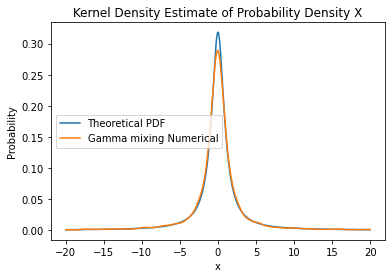

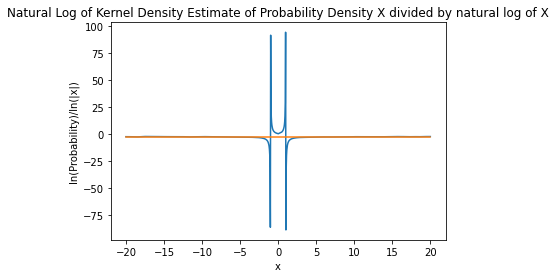

In [39]:
N=10000
alpha = 0.5
def F_alpha(y):
    return - np.log(np.abs(1-y)) * 2 * (1/(alpha * alpha))
def px_est(x, m=0.0, c=0.0):
    if x<0:
        return 0.5 * alpha * np.exp(-c + alpha*x - m * x*x)
    else:
        return 0.5 * alpha * np.exp(c - alpha*x + m * x*x)
y_pt3 = np.random.rand(N)
F_list = np.array([F_alpha(i) for i in y_pt3])
N_sample = np.random.randn(N) * (F_list) ** (1/2)
ks_density2 = ksdensity(N_sample, width=0.4)

x_values_pt1 = np.linspace(-20, 20, 1000)


ks_list2 = ks_density2(x_values_pt1)
#plt.plot(x_values_pt1, ks_list2, label = "Exponetial mixing")

theta = 0.5
v_list = np.random.gamma(theta, 1/theta, N)
u_list = 1/v_list
samples = np.random.randn(N) * (u_list) ** (1/2)
ks_density = ksdensity(samples, width=0.4)
def px_est_main(x):
    if x<0:
        return 0.5 * theta * np.exp(theta*x)
    else:
        return 0.5 * theta * np.exp(- theta*x)

def px_est(x, theta=theta):
    px = ((theta ** theta) / (((2 * np.pi) ** (1/2)) * scipy.special.gamma(theta))) * (2 / (x ** 2 + 2 * theta)) ** (theta + 1/2) * scipy.special.gamma(theta + 1/2)
    return px

x = np.random.randn(N)
mu, std = norm.fit(x)
x_values = np.linspace(-20, 20, 1000)
x_values_m = np.linspace(-10, 10, 100)  
p = norm.pdf(x_values, mu, std)
ks_list = ks_density(x_values)
px_est_list = [px_est(i) for i in x_values]
plt.plot(x_values, px_est_list, label="Theoretical PDF")
plt.plot(x_values, ks_list, label="Gamma mixing Numerical")

x_n = np.random.randn(N)
ks_density_n = ksdensity(x_n, width=0.4)

# plt.plot(x_values, ks_density_n(x_values), label="Normal")

px_est_main_list = [px_est_main(x) * 1000 for x in x_values]


x_values2, ks_list = zip(*((x, y) for x, y in zip(x_values, ks_list) if y != 0.0))
x_values3, ks_list_log = zip(*((x, y) for x, y in zip(x_values2, np.log(np.abs(ks_list))/np.log(np.abs(x_values2))) if x >= 10 and x <= 40))
x_values4, ks_list_log2 = zip(*((x, y) for x, y in zip(x_values2, np.log(np.abs(ks_list))/np.log(np.abs(x_values2))) if x >= 2.5 and x <= 5))
#model = np.poly1d(np.polyfit(x_values3, ks_list_log, 2))
model2 = np.poly1d(np.polyfit(x_values4, ks_list_log2, 0))
#p_model = [i **  (- 1.018 * theta - 2.027) for i in np.abs(x_values)]
#p_model_main = [ np.exp(model(i)) for i in np.abs(x_values_m)]
#plt.plot(x_values, p_model, label="Numerically Estimated PDF")
plt.legend()
plt.title("Kernel Density Estimate of Probability Density X")
plt.xlabel("x")
plt.ylabel("Probability")
plt.show()

# plt.hist(samples, bins=100)






# plt.show()

# plt.plot(x_values, px_est_main_list)
# plt.show()

plt.plot(x_values2, np.log(np.abs(ks_list))/np.log(np.abs(x_values2)))
#plt.plot(x_values2, model(x_values2))
plt.plot(x_values2, model2(x_values2))
plt.title("Natural Log of Kernel Density Estimate of Probability Density X divided by natural log of X")
plt.xlabel("x")
plt.ylabel("ln(Probability)/ln(|x|)")
plt.show()

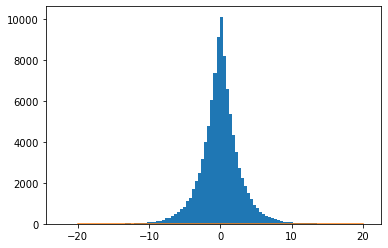

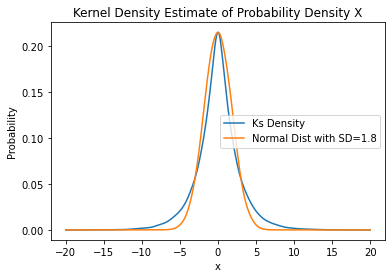

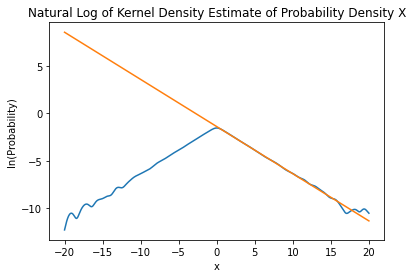

 
-0.4979 x - 1.388


In [26]:
alpha = 0.5

N=100000
y_pt3 = np.random.rand(N)

def F_alpha(y):
    return - np.log(np.abs(1-y)) * 2 * (1/(alpha * alpha))
def px_est(x, m=0.0, c=0.0):
    if x<0:
        return 0.5 * alpha * np.exp(-c + alpha*x - m * x*x)
    else:
        return 0.5 * alpha * np.exp(c - alpha*x + m * x*x)

F_list = np.array([F_alpha(i) for i in y_pt3])
N_sample = np.random.randn(N) * (F_list) ** (1/2)
ks_density = ksdensity(N_sample, width=0.4)

x_values = np.linspace(-20, 20, 1000)


ks_list = ks_density(x_values)

x_values2, ks_list = zip(*((x, y) for x, y in zip(x_values, ks_list) if y != 0.0))
x_values3, ks_list_log = zip(*((x, y) for x, y in zip(x_values, np.log(np.abs(ks_list))) if x >= 0 and x <= 8))

model = np.poly1d(np.polyfit(x_values3, ks_list_log, 1))
px_est_list = [px_est(x, m=0.0) for x in x_values]

x = np.random.randn(N) * 2.5
x2 = np.random.randn(N) *1.8
ks_density = ksdensity(x, width=0.4)
ks_density2 = ksdensity(x2, width=0.4)

plt.hist(N_sample, bins=100)
ks_density_N = ksdensity(N_sample, width=0.4)
plt.plot(x_values, ks_density_N(x_values))


plt.show()
plt.plot(x_values, ks_density_N(x_values), label='Ks Density')
#plt.plot(x_values, px_est_list, label='Suggested Formula')
#plt.plot(x_values, ks_density(x_values), label='Normal Dist with SD=2')
plt.plot(x_values, ks_density2(x_values), label='Normal Dist with SD=1.8')

plt.legend()
plt.title("Kernel Density Estimate of Probability Density X")
plt.xlabel("x")
plt.ylabel("Probability")
plt.show()

plt.plot(x_values2, np.log(np.abs(ks_list)))
plt.plot(x_values2, model(x_values2))
plt.title("Natural Log of Kernel Density Estimate of Probability Density X")
plt.xlabel("x")
plt.ylabel("ln(Probability)")
plt.show()

print(model)

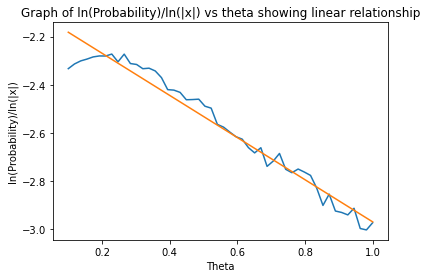

 
-0.8751 x - 2.095


In [27]:
theta_l=np.linspace(0.1,1, 50)
model_list = []

for i in range(len(theta_l)):
    v_list = np.random.gamma(theta_l[i], 1/theta_l[i], N)
    u_list = 1/v_list
    samples = np.random.randn(N) * (u_list) ** (1/2)
    ks_density = ksdensity(samples, width=0.4)
    
    x_values = np.linspace(-10,10, 1000)
    ks_list = ks_density(x_values)
    x_values2, ks_list = zip(*((x, y) for x, y in zip(x_values, ks_list) if y != 0.0))
    x_values3, ks_list_log = zip(*((x, y) for x, y in zip(x_values, np.log(np.abs(ks_list))/np.log(np.abs(x_values))) if x >= 10 and x <= 40))
    model_l = np.poly1d(np.polyfit(x_values3, ks_list_log, 0))
    model_list.append(model_l[0])


m = np.poly1d(np.polyfit(theta_l, model_list, 1))



plt.plot(theta_l, model_list)
plt.plot(theta_l, m(theta_l))
plt.title("Graph of ln(Probability)/ln(|x|) vs theta showing linear relationship")
plt.ylabel("ln(Probability)/ln(|x|)")
plt.xlabel("Theta")
plt.show()

print(m)

----

## Conclusions



- The kernel density method seems to be a better method for estimating probability density functions from samples as it is more versatile and scales the pdf, however the histogram method gives a quick way to visualise the data.

- Both inbuilt functions for generating samples from the normal and uniform distributions in python seem to follow multinomial theory and the distributions converge to the true distribution as the number of samples $N$ increases.

- More complex distributions can be created by passing the random variables, generated through the inbuilt python methods, through functions and the Jacobian method is a useful way to predict the probability density functions of these more complex distributions.

- The inverse CDF method gives a useful way to generate samples from a more complex distribution.

- The Monte Carlo estimation gives a method to approximate the mean and variance of a distribution using samples from the distribution. The Monte Carlo mean approximation was shown to converge to the true mean of the distribution with convergence rate $1/\sqrt{N}$. 

- Non-standard densities can be created by mixing normal PDFs with random variances drawn from another distribution. The shape of the final distribution is effected by which distribution the variance is sampled from and by key parameters in the sampling.

- The equation of the non-standard densities could be theorised by looking at the shape of a suitably devised logarithmic plot of the kernel density method, using samples from the distribution. The logarithmic plot can be devised depending on the mixing distribution.


